**Vamos experimentar agora o algoritmo Decision Tree?**

In [25]:
!pip -q install yellowbrick

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [27]:
import pickle
with open('merge.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [28]:
modelo = DecisionTreeClassifier(criterion='gini',max_depth=4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=5)



> **Vamos testar o modelo?**



In [29]:
previsoes = modelo.predict(X_teste)

In [30]:
previsoes

array([1., 1., 2., ..., 1., 2., 2.])



> **Será se o modelo acertou?**



In [31]:
y_teste

array([1., 1., 2., ..., 1., 2., 2.])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8493696084936961

In [33]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1061,  454],
       [   0, 1499]], dtype=int64)

0.8493696084936961

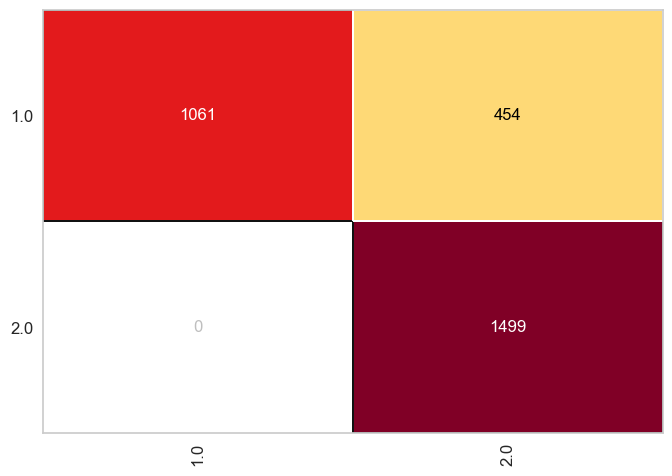

In [34]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [35]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         1.0       1.00      0.70      0.82      1515
         2.0       0.77      1.00      0.87      1499

    accuracy                           0.85      3014
   macro avg       0.88      0.85      0.85      3014
weighted avg       0.88      0.85      0.85      3014



In [36]:
from sklearn import tree
previsores = ['V0001','C006','C008','I00102','J01101','N001','N00101','N011','P00103','P00404','P00610','P00611','P018','P02002','P023','P02401','P027','P035','P050','P052','P053','P05401','P058','Q02901','Q03802','Q046015','Q046017','Q046018','VDF004']
class_names = [str(cls) for cls in modelo.classes_]
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(100,100))
tree.plot_tree(modelo, feature_names=previsores, class_names = class_names, filled=True)

[Text(0.53125, 0.9166666666666666, 'P052 <= 2.5\ngini = 0.5\nsamples = 12052\nvalue = [5857, 6195]\nclass = 2.0'),
 Text(0.5, 0.75, 'N001 <= 2.5\ngini = 0.43\nsamples = 9025\nvalue = [2830, 6195]\nclass = 2.0'),
 Text(0.25, 0.5833333333333334, 'C008 <= 53.5\ngini = 0.272\nsamples = 5005\nvalue = [813, 4192]\nclass = 2.0'),
 Text(0.125, 0.4166666666666667, 'P023 <= 0.5\ngini = 0.129\nsamples = 2663\nvalue = [184, 2479]\nclass = 2.0'),
 Text(0.0625, 0.25, 'P052 <= 1.214\ngini = 0.349\nsamples = 289\nvalue = [65, 224]\nclass = 2.0'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.248\nsamples = 262\nvalue = [38, 224]\nclass = 2.0'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = 1.0'),
 Text(0.1875, 0.25, 'P052 <= 1.214\ngini = 0.095\nsamples = 2374\nvalue = [119, 2255]\nclass = 2.0'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.068\nsamples = 1952\nvalue = [69, 1883]\nclass = 2.0'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.209\nsamples = 422